### Preamble

In [26]:
#################################################################
### This is for custom test cases for the PC algorithms
### Using the causal-learn package in a Juypiter notebook
#################################################################

### Install the relevant packages beforehand, including the causallearn package
import os, time
import sys
sys.path.append("")
import unittest
import hashlib
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz, d_separation
from causallearn.utils.cit import CIT
from causallearn.graph.SHD import SHD
from causallearn.utils.DAG2CPDAG import dag2cpdag
from causallearn.utils.TXT2GeneralGraph import txt2generalgraph
from causallearn.utils.Dataset import load_dataset
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.graph.ArrowConfusion import ArrowConfusion
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion

# Other stuff to install:
# 1. https://graphviz.org/download/ and this to the system PATH when you are installing graphviz.


### Simulation I: Comparing different types of CI test on Sach Data

In [27]:
data, labels = load_dataset("sachs")
data = np.array(data)
print(data.shape) # (number of samples, number of variables)
print(labels)  # Labels of the variables
print(data[0:5, :])  # First 5 samples


(7466, 11)
['raf', 'mek', 'plc', 'pip2', 'pip3', 'erk', 'akt', 'pka', 'pkc', 'p38', 'jnk']
[[ 26.4   13.2    8.82  18.3   58.8    6.61  17.   414.    17.    44.9
   40.  ]
 [ 35.9   16.5   12.3   16.8    8.13  18.6   32.5  352.     3.37  16.5
   61.5 ]
 [ 59.4   44.1   14.6   10.2   13.    14.9   32.5  403.    11.4   31.9
   19.5 ]
 [ 73.    82.8   23.1   13.5    1.29   5.83  11.8  528.    13.7   28.6
   23.1 ]
 [ 33.7   19.8    5.19   9.73  24.8   21.1   46.1  305.     4.66  25.7
   81.3 ]]


  0%|          | 0/11 [00:00<?, ?it/s]


 PC test using KCI completed.

 Computational Time Elapsed:  0.2928105999890249  seconds


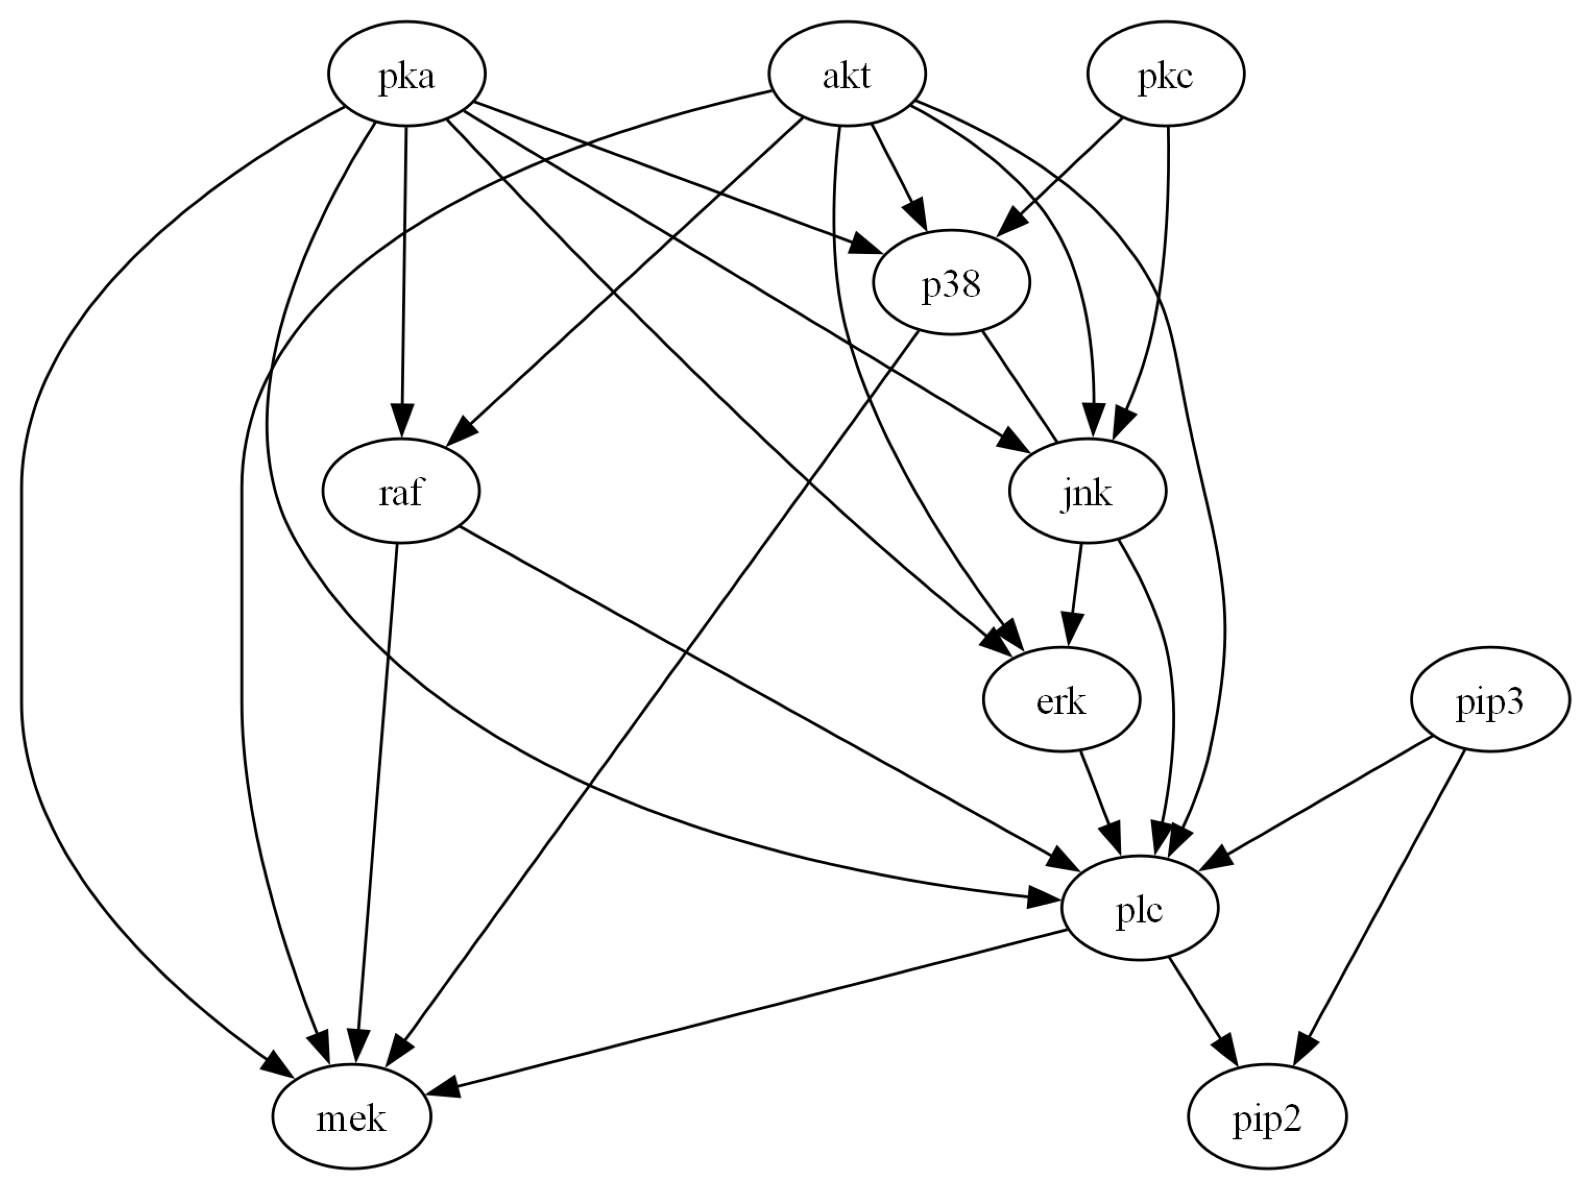

In [28]:
# Run the PC algorithm with different parameters
start_time = time.monotonic()
cg_fisherz = pc(data,
        alpha = 0.05,
        indep_test = fisherz,
        stable = True,
        uc_rule = 0,
        uc_priority = 2,
        mvpc = False,
        correction_name = 'MV_Crtn_Fisher_Z',
        background_knowledge = None,  # A way to add background knowledge
        verbose = False,
        show_progress = True
)
print("\n PC test using KCI completed.")
end_time = time.monotonic()
print("\n Computational Time Elapsed: ", end_time - start_time, " seconds" )


# Visualize using pydot and save the graph
cg_fisherz.draw_pydot_graph(labels=labels)
pyd_fisherz = GraphUtils.to_pydot(cg_fisherz.G)
pyd_fisherz.write_png('sach.png')

# Visualize using networks
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

In [34]:
# Run the PC algorithm with different parameters
start_time = time.monotonic()
kci_obj = CIT(data, "kci",
              #approx=True,           # Gamma fit, no permutations
              #est_width='median',    # cheap width selection
              cache_path="cache/sachs_kci_cache.json")  # reuse Gram matrices
cg_kci = pc(data,
        alpha = 0.05,
        indep_test_func=kci_obj,
        stable = True,
        uc_rule = 0,
        uc_priority = 2,
        mvpc = False,
        correction_name = 'MV_Crtn_Fisher_Z',
        background_knowledge = None,  # A way to add background knowledge
        verbose = True,
        show_progress = True
)
print("\n PC test using KCI completed.")
end_time = time.monotonic()
print("\n Computational Time Elapsed: ", end_time - start_time, " seconds" )

# Visualize using pydot and save the graph
cg_kci.draw_pydot_graph(labels=labels)
pyd_kci = GraphUtils.to_pydot(cg_kci.G)
pyd_kci.write_png('sach_kci.png')

# Visualize using networks
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

  0%|          | 0/11 [00:00<?, ?it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 dep 4 | () with p-value 0.000000

0 dep 5 | () with p-value 0.000000

0 dep 6 | () with p-value 0.000000

0 dep 7 | () with p-value 0.000000

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000000

0 dep 10 | () with p-value 0.000000

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

1 dep 8 | () with p-value 0.000000

1 dep 9 | () with p-value 0.000000



KeyboardInterrupt: 

In [ ]:
# For arrows
arrow = ArrowConfusion(truth_cpdag, est)

arrowsTp = arrow.get_arrows_tp()
arrowsFp = arrow.get_arrows_fp()
arrowsFn = arrow.get_arrows_fn()
arrowsTn = arrow.get_arrows_tn()

arrowPrec = arrow.get_arrows_precision()
arrowRec = arrow.get_arrows_recall()

# For adjacency matrices
adj = AdjacencyConfusion(truth_cpdag, est)

adjTp = adj.get_adj_tp()
adjFp = adj.get_adj_fp()
adjFn = adj.get_adj_fn()
adjTn = adj.get_adj_tn()

adjPrec = adj.get_adj_precision()
adjRec = adj.get_adj_recall()

# Structural Hamming Distance
shd = SHD(truth_cpdag, est).get_shd()